In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Датасет

## National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset

URL : https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

Датасет был собран в рамках Национального обследования здоровья и питания (NHANES), проводимого Центрами по контролю и профилактике заболеваний (CDC). В ходе исследования была собрана обширная информация о состоянии здоровья и питании различных групп населения США.

Сбор данных осуществлялся путем опроса, обследования и лабораторных исследований.

Данных датасет предоставляется для решения задачи классификации респондентов с целью определения их возрастной группы: "пожилые" (от 65 лет) и "не пожилые" (до 65 лет)

### Признаки

1. SEQN - ID респондента (числовое)
2. RIDAGEYR - реальный возраст респондента (числовое)
3. RIAGENDR - пол (1-Male, 2-Female)
4. PAQ605 -  показатель, показывающий если респондент занимается спортом, фитнесом или рекреационной деятельностью умеренной или энергичной интенсивности в течение обычной недели (1 - еженедельные физические нагрузки высокой интенсивности, 2 - их отсутствие)
5. BMXBMI - индекс массы тела респондента (числовое)
6. LBXGLU - уровень глюкозы в крови после голодания (числовое)
7. DIQ010 - страдает ли респондент диабетом
8. LBXGLT - Respondent's Oral (числовое)
9. LBXIN - уровень инсулина в крови (числовое)
10. **age_group** - таргет ('Adult' или 'Senior')

# EDA

In [2]:
raw_data = pd.read_csv('NHANES_age_prediction.csv')

Переименуем столбцы для удобства

In [3]:
raw_data = raw_data.rename(columns={'SEQN': 'id', 'RIDAGEYR': 'age', 'RIAGENDR': 'gender', 'PAQ605': 'sports',
                                    'BMXBMI': 'bmi', 'LBXGLU': 'glucose', 'DIQ010': 'diabetes', 'LBXGLT': 'oral',
                                    'LBXIN': 'insulin'})

In [4]:
raw_data.sample(15)

,id,age_group,age,gender,sports,bmi,glucose,diabetes,oral,insulin
816,77245.0,Senior,73.0,2.0,2.0,26.7,105.0,2.0,219.0,8.88
1457,80210.0,Adult,37.0,1.0,2.0,29.6,104.0,2.0,158.0,19.20
885,77522.0,Senior,80.0,1.0,2.0,21.8,96.0,2.0,171.0,3.23
467,75721.0,Adult,32.0,1.0,2.0,32.6,103.0,2.0,57.0,9.66
825,77265.0,Adult,41.0,2.0,2.0,41.3,103.0,2.0,105.0,8.88
500,75872.0,Adult,21.0,2.0,2.0,26.8,86.0,2.0,74.0,18.07
1653,80999.0,Adult,15.0,1.0,1.0,22.2,85.0,2.0,106.0,11.81
80,73962.0,Adult,49.0,1.0,1.0,31.9,90.0,2.0,89.0,37.67
1464,80238.0,Adult,22.0,1.0,1.0,28.6,107.0,2.0,125.0,5.24
218,74559.0,Adult,19.0,2.0,2.0,23.4,97.0,2.0,92.0,11.70


In [5]:
raw_data.shape

(2278, 10)

Без пропусков

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   age        2278 non-null   float64
 3   gender     2278 non-null   float64
 4   sports     2278 non-null   float64
 5   bmi        2278 non-null   float64
 6   glucose    2278 non-null   float64
 7   diabetes   2278 non-null   float64
 8   oral       2278 non-null   float64
 9   insulin    2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [7]:
data = raw_data.drop('age_group', axis=1)

In [8]:
C = len(data.columns)
L = len(data.index)
CN = data.count()  #количество
NP = ((L - CN) / L) * 100  #процент пропущенных значений
MN = data.min()  #минимум
Q1 = data.quantile(q=0.25)  #первый квартиль
MA = data.mean()  #среднее значение
ME = data.median()  #медиана
Q3 = data.quantile(q=0.75)  #третий квартиль
MX = data.max()  #максимум
ST = data.std()  #стандартное отклонение
P = data.nunique()  #мощность
IQ = Q3 - Q1  #интерквартильный размах

In [9]:
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame = frame.T
adv_info = pd.DataFrame(frame)
adv_info.index = ['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль', 'Среднее', 'Медиана',
                  'Третий квартиль', 'Максимум', 'Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
adv_info_styler = adv_info.style \
    .apply(lambda x: ["background-color:tomato" if i == 1 else "" for i in x], axis=1,
           subset=(["Мощность"], slice(None))) \
    .apply(lambda x: ["background-color:tomato" if i >= 60 else "" for i in x], axis=1,
           subset=(["Процент пропусков"], slice(None))) \
    .apply(lambda x: ["background-color:steelblue" if (i < 30 and i > 0) else "" for i in x], axis=1,
           subset=(["Процент пропусков"], slice(None))) \
    .apply(lambda x: ["background-color:limegreen" if i == 0 else "" for i in x], axis=1,
           subset=(["Процент пропусков"], slice(None)))

In [10]:
adv_info_styler

,id,age,gender,sports,bmi,glucose,diabetes,oral,insulin
Количество,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
Процент пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Минимум,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
Первый квартиль,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
Среднее,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
Медиана,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
Третий квартиль,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
Максимум,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000
Стандартное отклонение,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
Мощность,2278.000000,69.000000,2.000000,3.000000,340.000000,101.000000,3.000000,232.000000,1424.000000


Видно, что мощность у показателя sports = 3, а должна быть 2

In [11]:
raw_data.sports.unique()

array([2., 1., 7.])

In [12]:
raw_data.sports.value_counts()

sports
2.0    1868
1.0     409
7.0       1
Name: count, dtype: int64

In [13]:
raw_data[raw_data.sports == 7.]

,id,age_group,age,gender,sports,bmi,glucose,diabetes,oral,insulin
413,75487.0,Adult,51.0,1.0,7.0,21.1,110.0,2.0,66.0,4.24


In [14]:
raw_data = raw_data[raw_data.sports != 7.]

In [15]:
raw_data = raw_data.reset_index(drop=True)

In [16]:
raw_data.shape

(2277, 10)

Убираем лишние столбцы

In [17]:
raw_data = raw_data.drop(['id', 'age'], axis=1)

In [18]:
raw_data

,age_group,gender,sports,bmi,glucose,diabetes,oral,insulin
0,Adult,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...
2272,Adult,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2273,Adult,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2274,Adult,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2275,Adult,2.0,2.0,27.4,90.0,2.0,108.0,4.99


<Axes: xlabel='age_group', ylabel='count'>

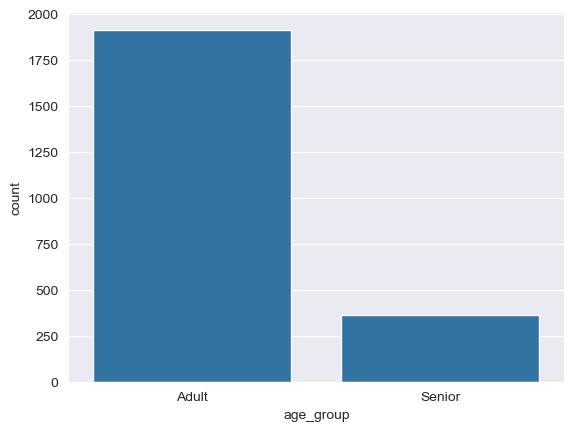

In [19]:
sns.countplot(raw_data, x="age_group")

In [20]:
raw_data.age_group.value_counts()

age_group
Adult     1913
Senior     364
Name: count, dtype: int64

Кодируем целевую переменную и меняем значения категориальных gender, sports, diabetes

In [21]:
raw_data['age_group'] = raw_data['age_group'].apply(lambda x: 1 if x == 'Adult' else 0)
raw_data['gender'] = raw_data['gender'].apply(lambda x: 1 if x == 1. else 0)
raw_data['sports'] = raw_data['sports'].apply(lambda x: 1 if x == 1. else 0)
raw_data['diabetes'] = raw_data['diabetes'].apply(lambda x: int(x) - 1)

In [22]:
raw_data.head()

,age_group,gender,sports,bmi,glucose,diabetes,oral,insulin
0,1,0,0,35.7,110.0,1,150.0,14.91
1,1,0,0,20.3,89.0,1,80.0,3.85
2,1,1,0,23.2,89.0,1,68.0,6.14
3,1,1,0,28.9,104.0,1,84.0,16.15
4,1,0,1,35.9,103.0,1,81.0,10.92


In [23]:
data_cat = raw_data[['age_group', 'gender', 'sports', 'diabetes']]
data_num = raw_data[['bmi', 'glucose', 'oral', 'insulin']]

### Heatmap

<Axes: >

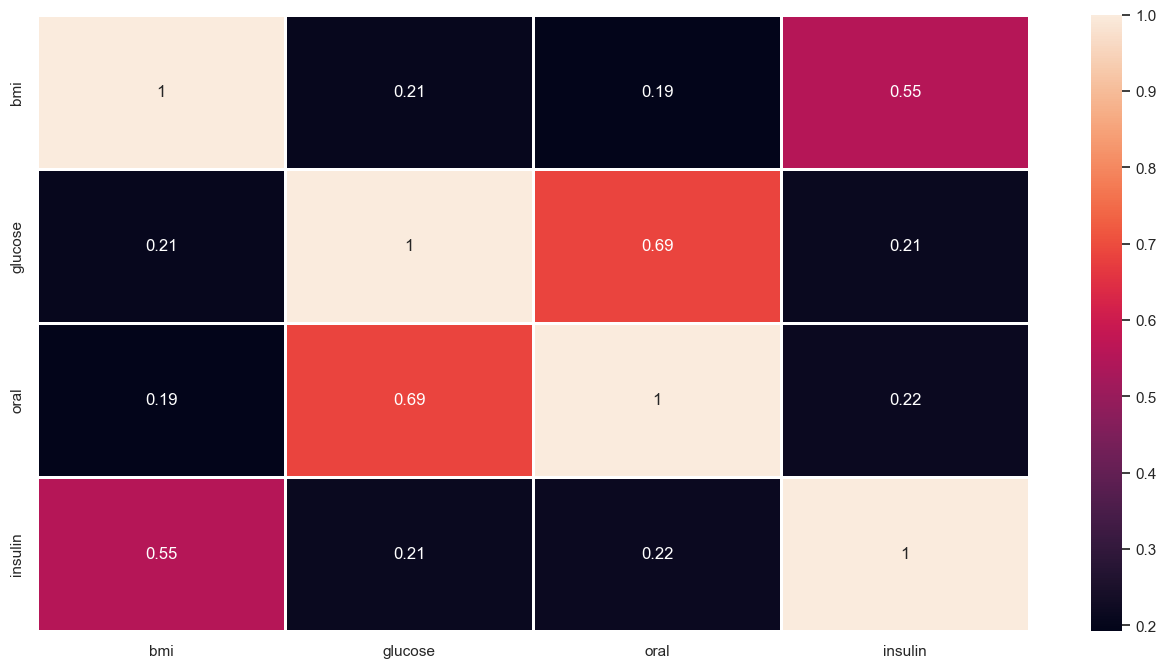

In [24]:
sns.set(rc={'figure.figsize': (16, 8)})
sns.heatmap(data_num.corr(), annot=True, linewidths=2, cbar=True)

Взаимных корреляций нет

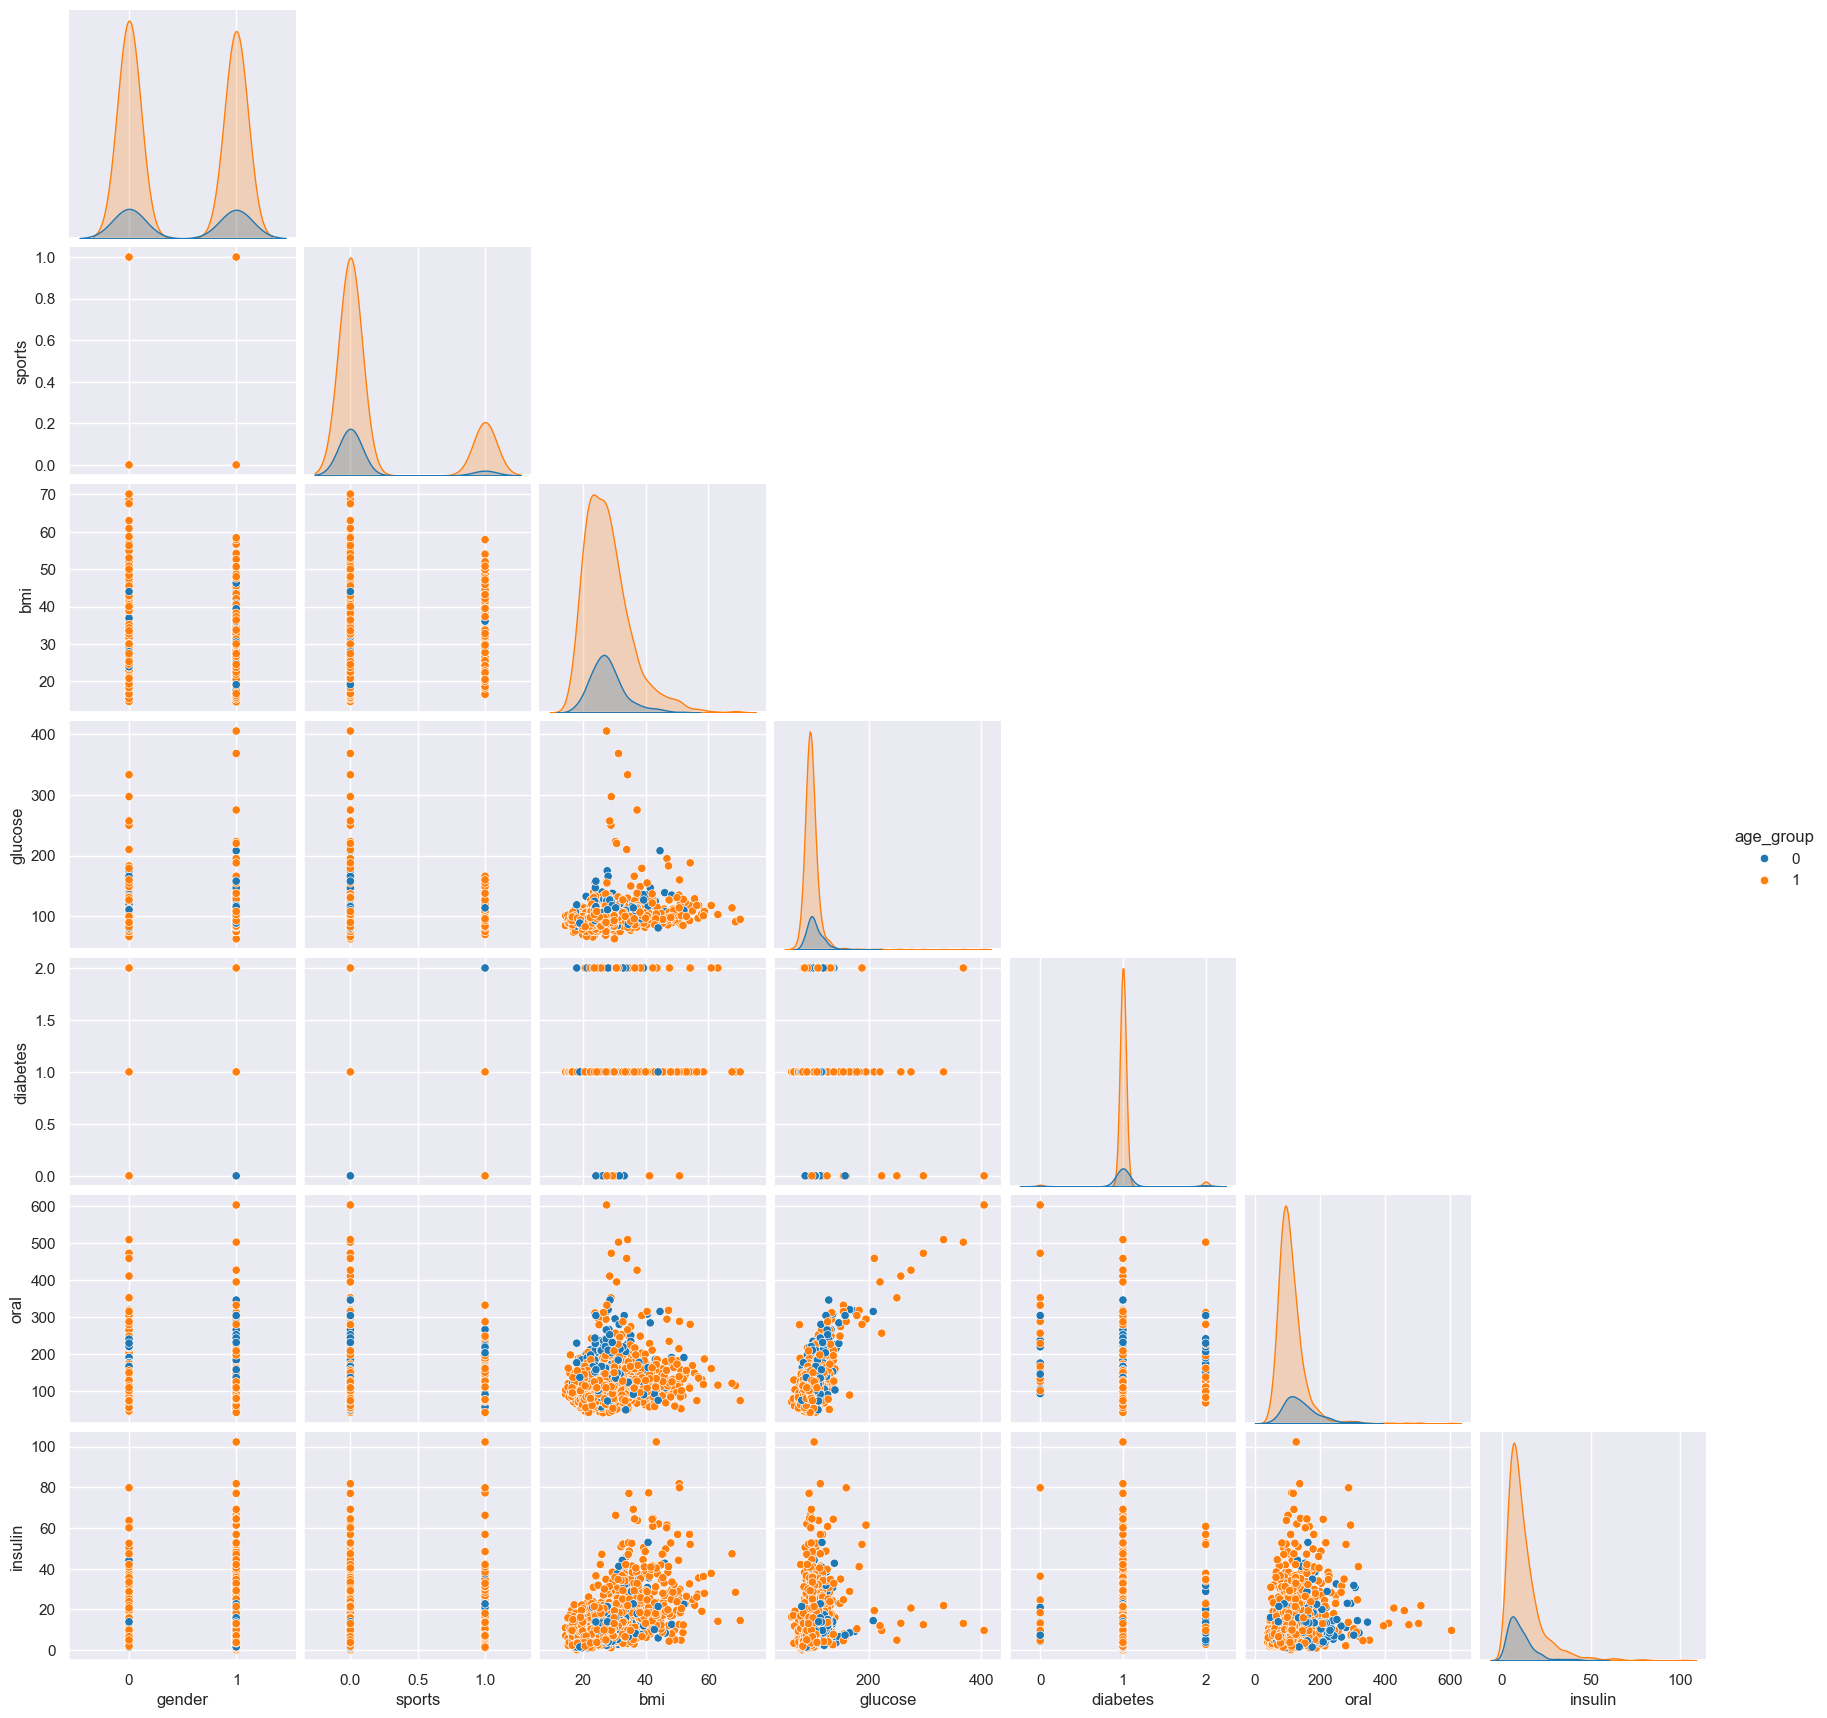

In [25]:
sns.pairplot(raw_data,
             hue='age_group',
             palette="tab10",
             corner=True)

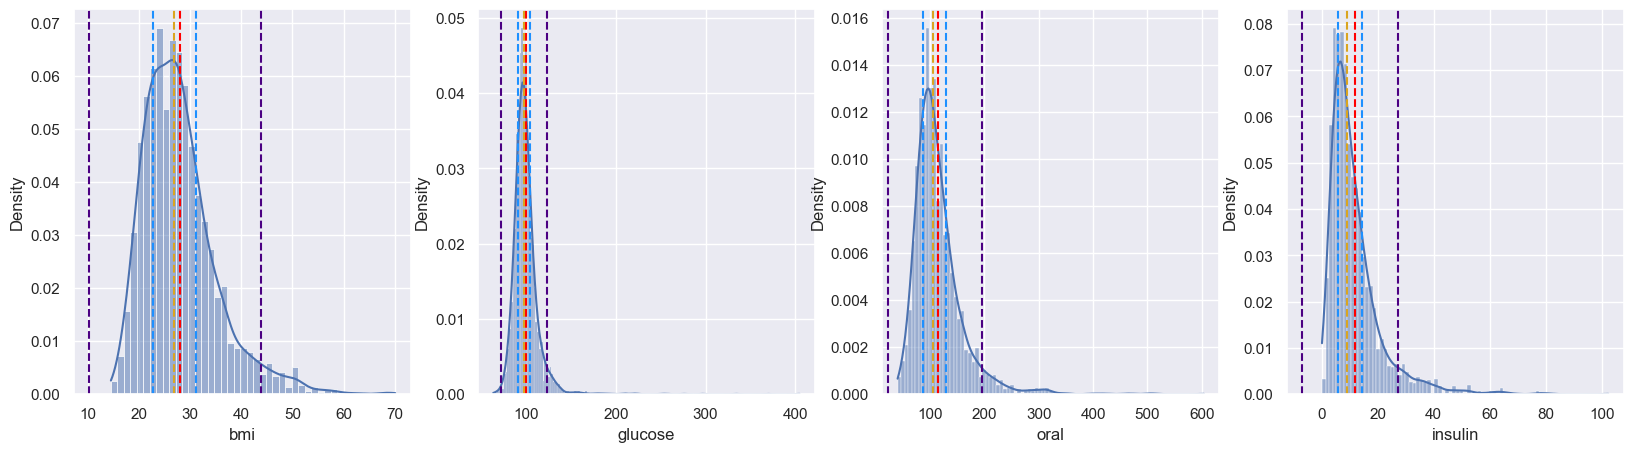

In [26]:
f, ax = plt.subplots(1, 4, figsize=(20, 5))

j = 0
for column in data_num.columns:
    sns.histplot(data_num[column], ax=ax[j], kde=True, stat="density")
    ax[j].axvline(adv_info.iloc[3][column] - 1.5 * adv_info.iloc[10][column], color="indigo", ls='--')  #q1-1.5*iqr
    ax[j].axvline(adv_info.iloc[3][column], color="dodgerblue", ls='--')  #первый квартиль
    ax[j].axvline(adv_info.iloc[4][column], color="red", ls='--')  #среднее
    ax[j].axvline(adv_info.iloc[5][column], color="goldenrod", ls='--')  #медиана
    ax[j].axvline(adv_info.iloc[6][column], color="dodgerblue", ls='--')  #третий квартиль
    ax[j].axvline(adv_info.iloc[6][column] + 1.5 * adv_info.iloc[10][column], color="indigo", ls='--')  #q3+1.5*

    j += 1


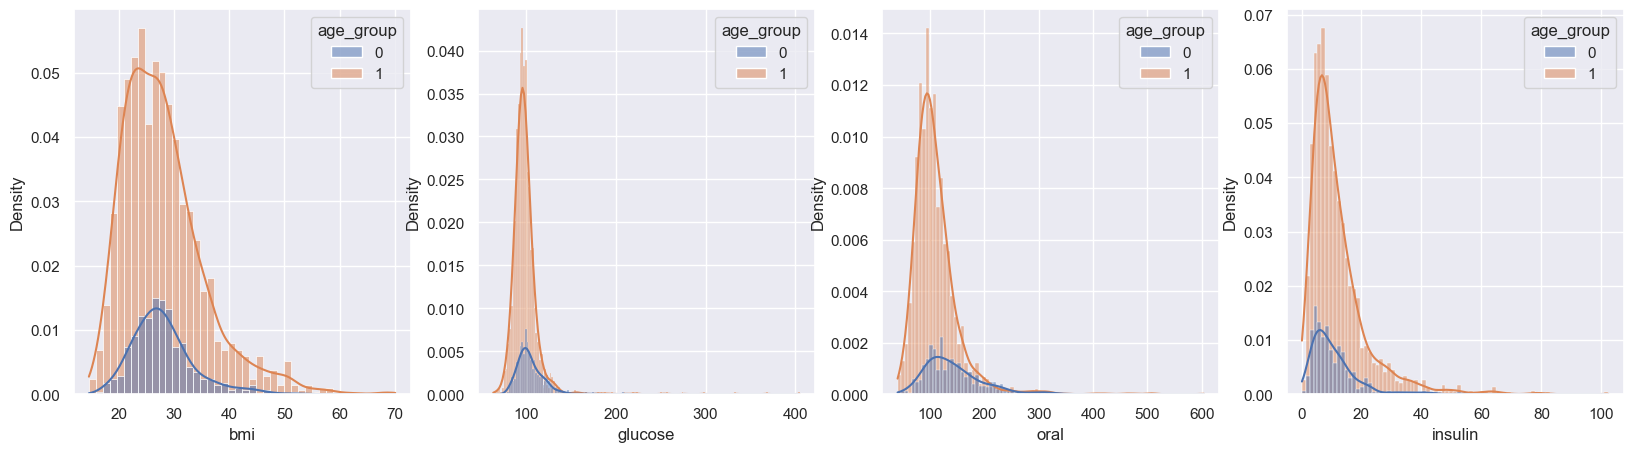

In [27]:
f, ax = plt.subplots(1, 4, figsize=(20, 5))

j = 0
for column in data_num.columns:
    sns.histplot(data=raw_data, x=column, ax=ax[j], hue='age_group', kde=True, stat="density")

    j += 1

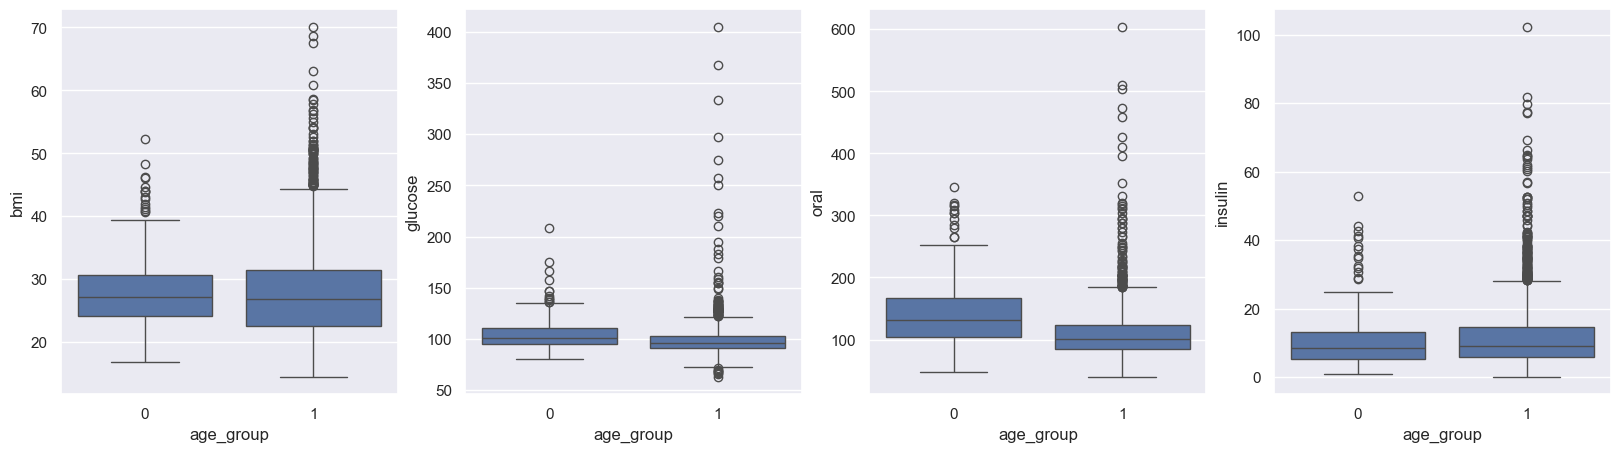

In [28]:
f, ax = plt.subplots(1, 4, figsize=(20, 5))

j = 0
for column in data_num.columns:
    sns.boxplot(data=raw_data, x='age_group', y=column, ax=ax[j])

    j += 1

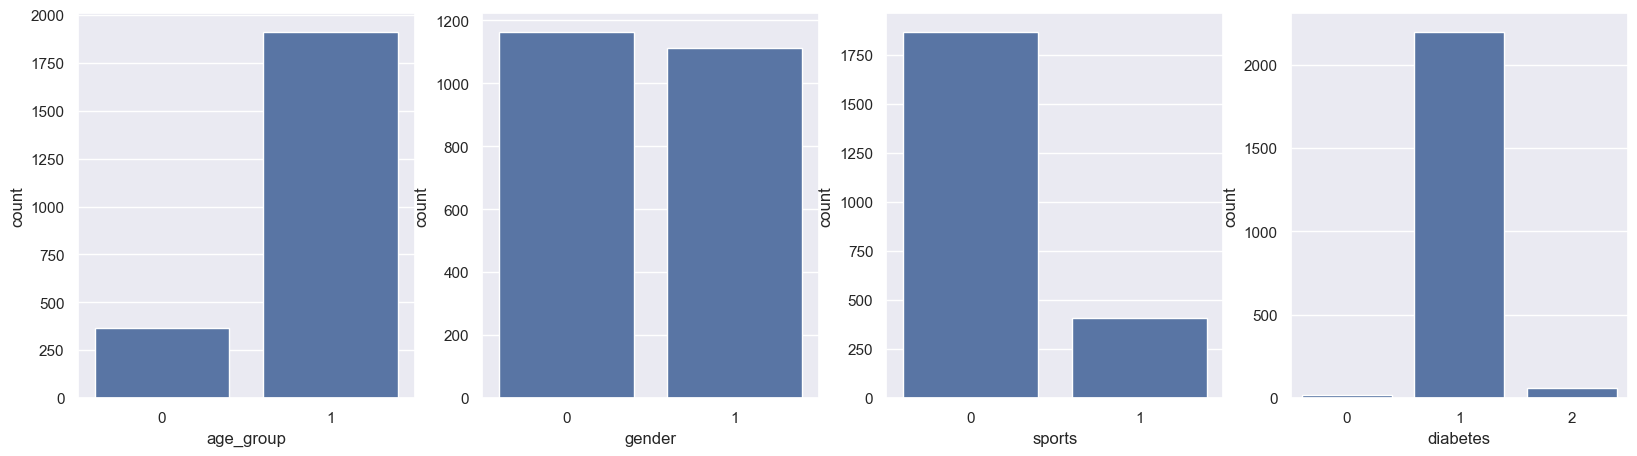

In [29]:
f, ax = plt.subplots(1, 4, figsize=(20, 5))

j = 0
for column in data_cat.columns:
    sns.countplot(data=raw_data, x=column, ax=ax[j])

    j += 1

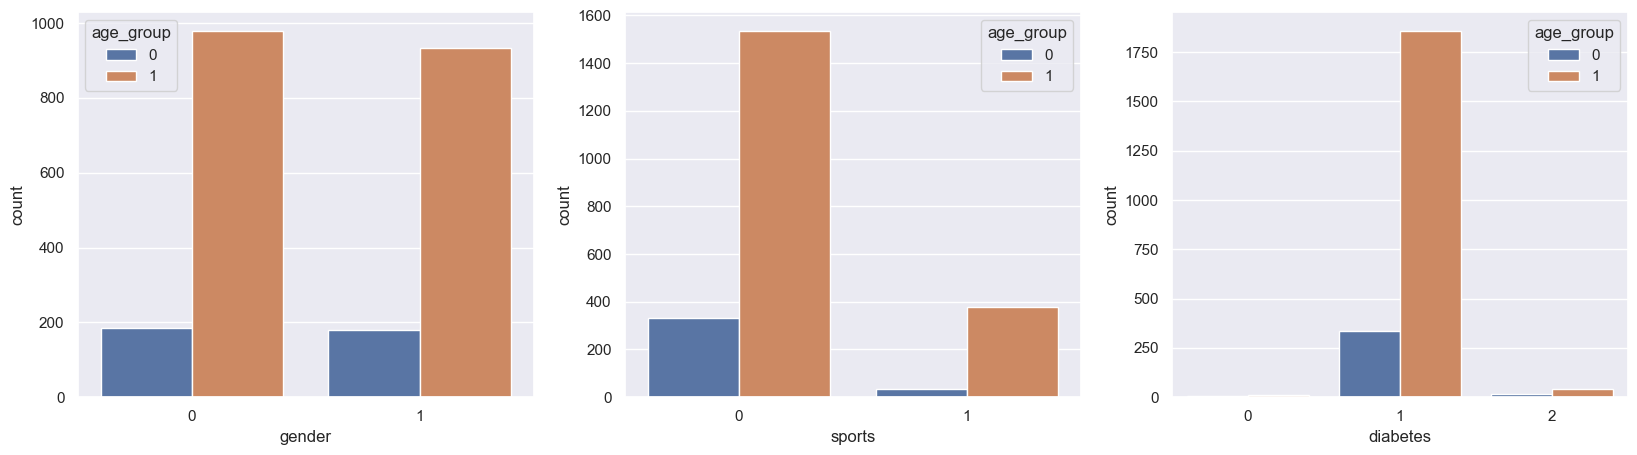

In [30]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))

j = 0
for column in data_cat.columns[1:]:
    sns.countplot(data=raw_data, x=column, ax=ax[j], hue='age_group')

    j += 1

### Сохраняем предобработанный датасет

In [31]:
raw_data.to_csv('prepared_data.csv', index=False)